In [1]:

import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import datetime  
import tensorflow  
from statsmodels.tsa.stattools import adfuller  
from sklearn.preprocessing import MinMaxScaler  
from tensorflow import keras  
from keras import callbacks  
from tensorflow.keras import Sequential  
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional  
from tensorflow.keras.optimizers import SGD  
import math  
from sklearn.metrics import mean_squared_error  
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

import warnings  
warnings.filterwarnings("ignore")  

df=pd.read_csv("traffic.csv")


df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


## EXPLORATORY DATA ANALYSIS

In [2]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Extract day, month, and year
df["date"] = df["DateTime"].dt.day
df["month"] = df["DateTime"].dt.month
df["year"] = df["DateTime"].dt.year
df["time"] = df["DateTime"].dt.time
# Extract time
df["hour"] =pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")  
#df["minute"]=pd.to_datetime(df['time'], format='%H:%M:%S').dt.minute
#df["second"]=pd.to_datetime(df['time'], format='%H:%M:%S').dt.second
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [3]:
#df=df.drop(["day"],axis=1)
df

,DateTime,Junction,Vehicles,ID,date,month,year,time,hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,1,11,2015,1900-01-01 00:00:00,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,1,11,2015,1900-01-01 01:00:00,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,1,11,2015,1900-01-01 02:00:00,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,1,11,2015,1900-01-01 03:00:00,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,1,11,2015,1900-01-01 04:00:00,4,Sunday
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,30,6,2017,1900-01-01 19:00:00,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,30,6,2017,1900-01-01 20:00:00,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,30,6,2017,1900-01-01 21:00:00,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,30,6,2017,1900-01-01 22:00:00,22,Friday


Text(0.5, 0, 'Date')

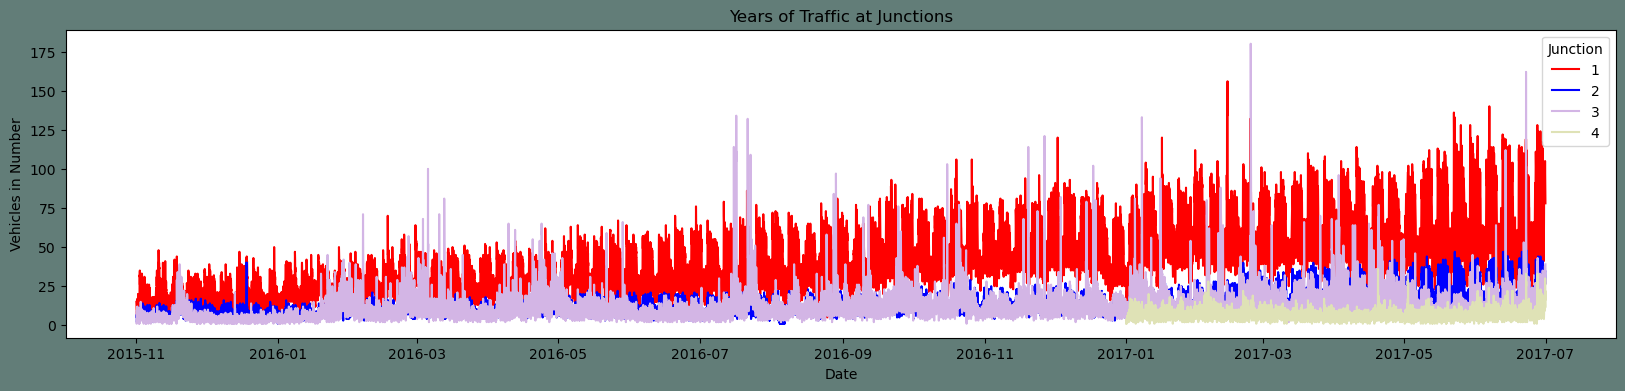

In [4]:
# Let's plot the Timeseries  
colors = [ "#FF0000","#0000FF","#D3B5E5","#dfe2b6"]  
plt.figure(figsize=(20,4),facecolor="#627D78")  
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction",palette=colors)  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   date      48120 non-null  int64         
 5   month     48120 non-null  int64         
 6   year      48120 non-null  int64         
 7   time      48120 non-null  datetime64[ns]
 8   hour      48120 non-null  int64         
 9   Day       48120 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 3.7+ MB


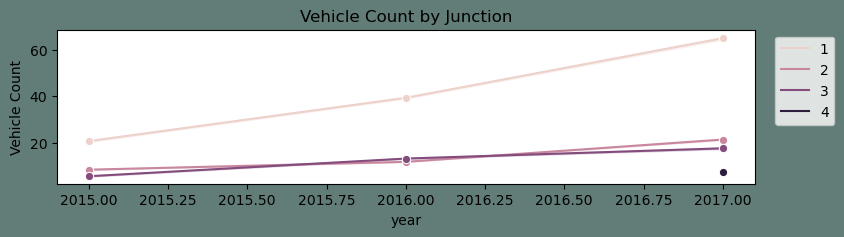

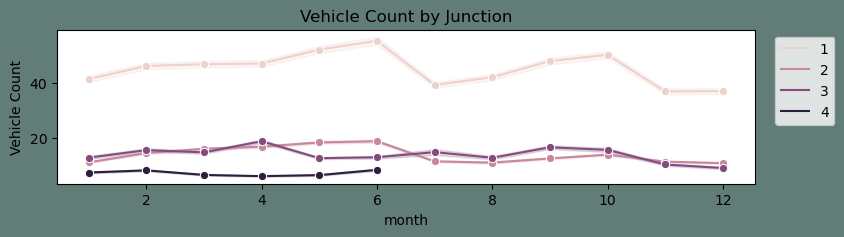

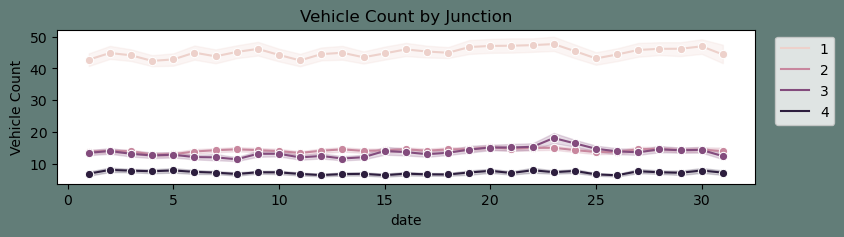

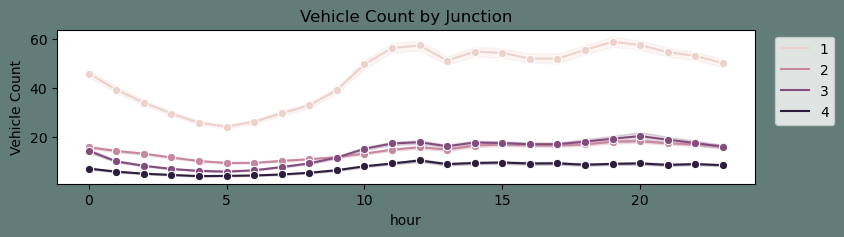

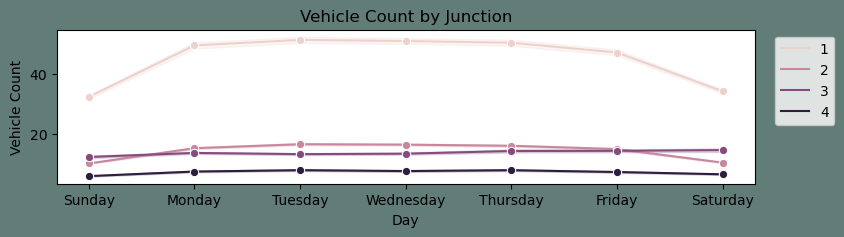

In [6]:
# Plot the line chart using seaborn
features = [ "year","month", "date", "hour", "Day"]  
for i in features:
    plt.figure(figsize=(9,2),facecolor="#627D78")  
    sns.lineplot(data=df, x=i, y='Vehicles', hue='Junction', marker='o')
    # Set labels and title
    plt.xlabel(i)
    plt.ylabel('Vehicle Count')
    plt.title('Vehicle Count by Junction')

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.show()

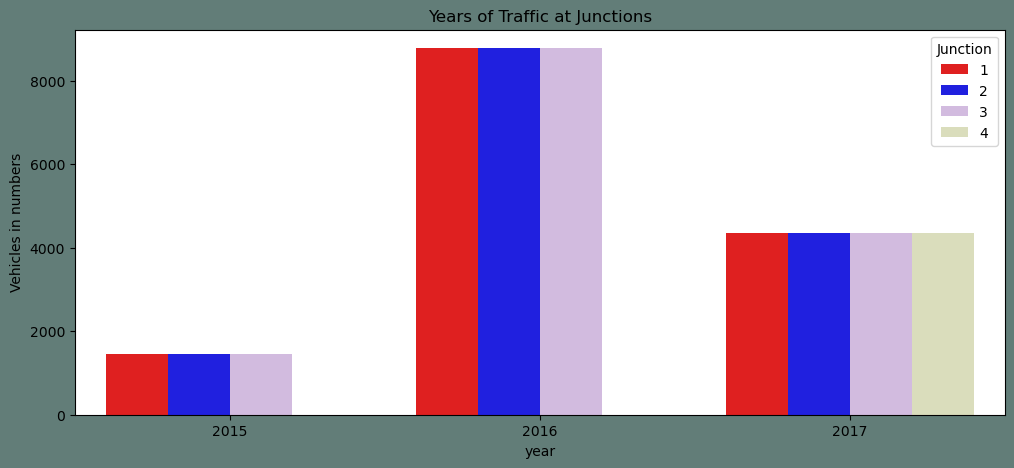

In [7]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=df, x =df["year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("year") 

plt.show()

In [8]:
df= df.pivot(index='DateTime', columns='Junction', values='Vehicles')
df=df.sort_index()
df

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [9]:
df.isnull().sum()
df=df.rename(columns={1:"junction 1",2:"junction 2",3:"junction 3",4:"junction 4"})
#df.isna().sum()
df=df.asfreq("H")
df.isna().sum()

Junction
junction 1        0
junction 2        0
junction 3        0
junction 4    10248
dtype: int64

In [10]:
df=df.fillna(int(df["junction 4"].mean()))
df.isna().sum()
df

Junction,junction 1,junction 2,junction 3,junction 4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,7.0
2015-11-01 01:00:00,13.0,6.0,7.0,7.0
2015-11-01 02:00:00,10.0,5.0,5.0,7.0
2015-11-01 03:00:00,7.0,6.0,1.0,7.0
2015-11-01 04:00:00,9.0,7.0,2.0,7.0
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
df[df.columns]= scaler.fit_transform(df[df.columns])

df

Junction,junction 1,junction 2,junction 3,junction 4
DateTime,,,,
2015-11-01 00:00:00,0.066225,0.106383,0.044693,0.171429
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.171429
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.171429
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.171429
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.171429
...,...,...,...,...
2017-06-30 19:00:00,0.662252,0.702128,0.178771,0.285714
2017-06-30 20:00:00,0.602649,0.723404,0.167598,0.828571
2017-06-30 21:00:00,0.562914,0.638298,0.150838,0.428571


In [12]:
#Splitting the data
#splitting using iloc method and length function
size=int(len(df)*0.8)
size
df_train=df.iloc[:size]
df_test=df.iloc[size:]
df_train


Junction,junction 1,junction 2,junction 3,junction 4
DateTime,,,,
2015-11-01 00:00:00,0.066225,0.106383,0.044693,0.171429
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.171429
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.171429
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.171429
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.171429
...,...,...,...,...
2017-03-01 04:00:00,0.245033,0.340426,0.027933,0.114286
2017-03-01 05:00:00,0.225166,0.340426,0.050279,0.057143
2017-03-01 06:00:00,0.251656,0.361702,0.044693,0.114286


In [13]:
df_test.head()

Junction,junction 1,junction 2,junction 3,junction 4
DateTime,,,,
2017-03-01 09:00:00,0.364238,0.531915,0.089385,0.200000
2017-03-01 10:00:00,0.456954,0.425532,0.083799,0.085714
2017-03-01 11:00:00,0.523179,0.510638,0.145251,0.257143
2017-03-01 12:00:00,0.543046,0.446809,0.156425,0.228571
2017-03-01 13:00:00,0.483444,0.468085,0.100559,0.171429


### Test for stationarity

In [14]:
def Stationary_check(dataframe):  
    check = adfuller(dataframe.dropna())  
    print(f"ADF Statistic: {check[0]}")  
    print(f"p-value: {check[1]}")  
    print("Critical Values:")
    for key, value in check[4].items():  
        print('\t%s: %.3f' % (key, value))
columns=["junction 1","junction 2","junction 3","junction 4"]
for i in columns:
    print("The test for ",i)
    Stationary_check(df[i])


The test for  junction 1
ADF Statistic: -7.148077688286681
p-value: 3.1938429963627986e-10
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The test for  junction 2
ADF Statistic: -8.041077275597678
p-value: 1.8463683667709498e-12
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The test for  junction 3
ADF Statistic: -8.236600353698044
p-value: 5.8672958558687e-13
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The test for  junction 4
ADF Statistic: -10.671803424843981
p-value: 4.1488288104959944e-19
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


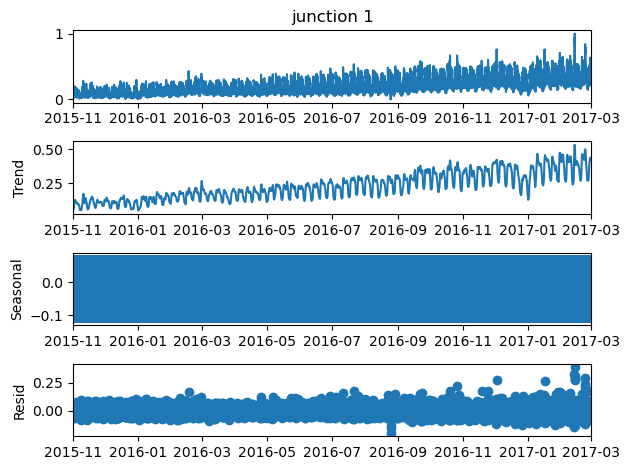

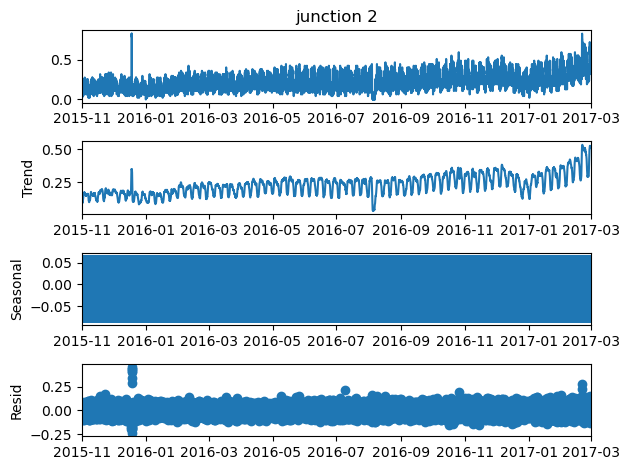

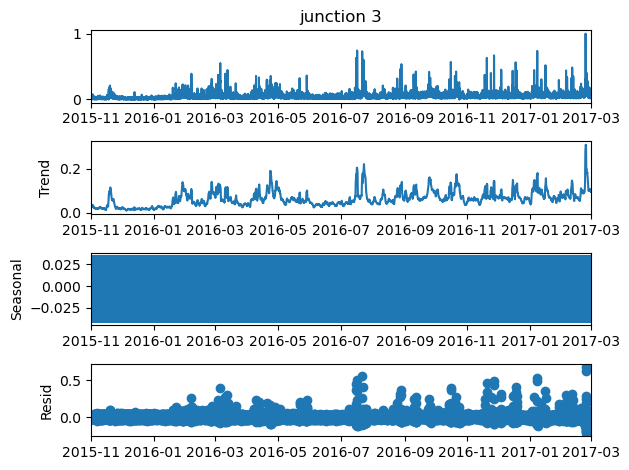

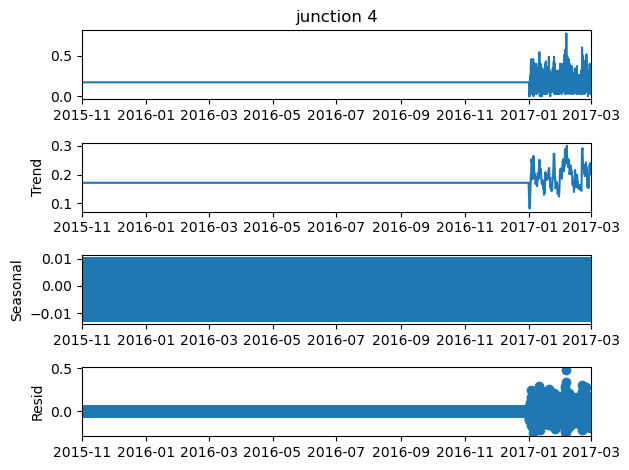

In [15]:
def seasonality_plot(column):
    s_dec_add=seasonal_decompose(df_train[column],model="additive")
    s_dec_add.plot()
    plt.show()
for i in columns:
    seasonality_plot(i)
